In [2]:
from graph_traffic.config import training_path, results_path
import pandas as pd
from graph_traffic.model_selection import get_node_ids
import matplotlib.pyplot as plt

ids_list = get_node_ids()
#########################
# A: Long-time forecast #
#########################
long_term = dict()
# A1. baseline
# A1.1 mean
long_term["mean"] = dict()
long_term["mean"]["maes"] = pd.read_csv(f"{training_path}/baseline/mean_regressor/mean_maes.csv", index_col=0)
long_term["mean"]["mses"] = pd.read_csv(f"{training_path}/baseline/mean_regressor/mean_mses.csv", index_col=0)
# A1.2 median
long_term["median"] = dict()
long_term["median"]["maes"] = pd.read_csv(f"{training_path}/baseline/median_regressor/median_maes.csv", index_col=0)
long_term["median"]["mses"] = pd.read_csv(f"{training_path}/baseline/median_regressor/median_mses.csv", index_col=0)
# A1.3 daytime mean
long_term["daytime_mean"] = dict()
long_term["daytime_mean"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_mean/daytime-maes.csv", index_col=0)
long_term["daytime_mean"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_mean/daytime-mses.csv", index_col=0)
# A1.4 daytime mean with working day
long_term["daytime_mean_ww"] = dict()
long_term["daytime_mean_ww"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_mean_with_workingday/daytime-maes.csv", index_col=0)
long_term["daytime_mean_ww"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_mean_with_workingday/daytime-mses.csv", index_col=0)
# A1.5 daytime mean
long_term["daytime_median"] = dict()
long_term["daytime_median"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_median/daytime-maes.csv", index_col=0)
long_term["daytime_median"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_median/daytime-mses.csv", index_col=0)
# A1.6 daytime mean with working day
long_term["daytime_median_ww"] = dict()
long_term["daytime_median_ww"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_median_with_workingday/daytime-maes.csv", index_col=0)
long_term["daytime_median_ww"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_median_with_workingday/daytime-mses.csv", index_col=0)
# A2. linear regression
# A2.1 first linear regression
long_term["lin-reg1"] = dict()
long_term["lin-reg1"]["maes"] = pd.read_csv(f"{training_path}/regression/final/first/maes_per_sensor-reg1.csv", index_col=0)
long_term["lin-reg1"]["mses"] = pd.read_csv(f"{training_path}/regression/final/first/mses_per_sensor-reg1.csv", index_col=0)
# A2.2 second linear regression
long_term["lin-reg2"] = dict()
long_term["lin-reg2"]["maes"] = pd.read_csv(f"{training_path}/regression/final/second/maes_per_sensor-reg2.csv", index_col=0)
long_term["lin-reg2"]["mses"] = pd.read_csv(f"{training_path}/regression/final/second/mses_per_sensor-reg2.csv", index_col=0)
# A3. XGBoost regressor
long_term["xgboost"] = dict()
long_term["xgboost"]["maes"] = pd.read_csv(f"{training_path}/xgboost/xgb_maes.csv", index_col=0)
long_term["xgboost"]["mses"] = pd.read_csv(f"{training_path}/xgboost/xgb_mses.csv", index_col=0)

##########################
# B: Short-time forecast #
##########################
short_term = dict()
# B1 Baseline
# B1.1 repeat complete
short_term["repeat"] = dict()
for seq_len in [2, 4, 8, 16]:
        short_term["repeat"][seq_len] = dict()
        short_term["repeat"][seq_len]["maes"] = pd.read_csv(f"{training_path}/baseline/repeat/repeat-maes_{seq_len}.csv", index_col=0)
        short_term["repeat"][seq_len]["mses"] = pd.read_csv(f"{training_path}/baseline/repeat/repeat-mses_{seq_len}.csv", index_col=0)
# B1.2 repeat last
short_term["repeat_last"] = dict()
for seq_len in [2, 4, 8, 16]:
        short_term["repeat_last"][seq_len] = dict()
        short_term["repeat_last"][seq_len]["maes"] = pd.read_csv(f"{training_path}/baseline/repeat_last/repeat-last-maes_{seq_len}.csv", index_col=0)
        short_term["repeat_last"][seq_len]["mses"] = pd.read_csv(f"{training_path}/baseline/repeat_last/repeat-last-mses_{seq_len}.csv", index_col=0)
# B1.3 drift regressor
short_term["drift"] = dict()
for seq_len in [2, 4, 8, 16]:
        short_term["drift"][seq_len] = dict()
        short_term["drift"][seq_len]["maes"] = pd.read_csv(f"{training_path}/baseline/drift/drift-maes_{seq_len}.csv", index_col=0)
        short_term["drift"][seq_len]["mses"] = pd.read_csv(f"{training_path}/baseline/drift/drift-mses_{seq_len}.csv", index_col=0)
# B.2 GNN
for config in range(1, 6):
        short_term[f"gnn_config{config}"] = dict()
        short_term[f"gnn_config{config}"][config] = dict()
        for seq_len in [2, 4, 8, 16]:
                short_term[f"gnn_config{config}"][seq_len] = dict()
                short_term[f"gnn_config{config}"][seq_len]["maes"] = pd.read_csv(f"{training_path}/gnn/config{config}/maes_{seq_len}.csv", index_col=0)
                short_term[f"gnn_config{config}"][seq_len]["mses"] = pd.read_csv(f"{training_path}/gnn/config{config}/mses_{seq_len}.csv", index_col=0)

C:\Users\Bened\PycharmProjects\madrid-traffic\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Results of long term

In [4]:
long_term_maes_avg = dict()
long_term_mses_avg = dict()
for model_name, loss_dict in long_term.items():
        maes = loss_dict["maes"]
        mses = loss_dict["mses"]
        long_term_maes_avg[model_name] = maes["avg"]
        long_term_mses_avg[model_name] = mses["avg"]


long_term_maes_avg = pd.DataFrame(long_term_maes_avg)
long_term_maes_avg["best_model"] = long_term_maes_avg.idxmin(axis=1)
long_term_maes_avg.to_csv(f"{results_path}/long-term/long-term-MAE.csv", sep=";", decimal=",")

long_term_mses_avg = pd.DataFrame(long_term_mses_avg)
long_term_mses_avg["best_model"] = long_term_mses_avg.idxmin(axis=1)
long_term_mses_avg.to_csv(f"{results_path}/long-term/long-term-MSE.csv", sep=";", decimal=",")

In [13]:
best_models = pd.DataFrame([], index=long_term_maes_avg.columns, columns=["Mejor modelo según MAE", "Mejor modelo según MSE"])
best_models["Mejor modelo según MAE"] = long_term_maes_avg.best_model.value_counts()
best_models["Mejor modelo según MSE"] = long_term_mses_avg.best_model.value_counts()
best_models.fillna(0).astype(int)

,Mejor modelo según MAE,Mejor modelo según MSE
mean,0,0
median,0,0
daytime_mean,0,1
daytime_mean_ww,3,13
daytime_median,0,0
daytime_median_ww,20,6
lin-reg1,0,1
lin-reg2,0,1
xgboost,14,15
best_model,0,0


# Results of short term

In [5]:
for seq_len in [2, 4, 8, 16]:
        short_term_maes_avg = dict()
        short_term_mses_avg = dict()
        for model_name, loss_dict in short_term.items():
                loss_dict = loss_dict[seq_len]
                maes = loss_dict["maes"]
                mses = loss_dict["mses"]
                short_term_maes_avg[model_name] = maes["avg"]
                short_term_mses_avg[model_name] = mses["avg"]
        short_term_maes_avg = pd.DataFrame(short_term_maes_avg)
        short_term_maes_avg["best_model"] = short_term_maes_avg.idxmin(axis=1)
        short_term_maes_avg.to_csv(f"{results_path}/short-term/{seq_len}-periods/MAE.csv", sep=";", decimal=",")
        short_term_mses_avg = pd.DataFrame(short_term_mses_avg)
        short_term_mses_avg["best_model"] = short_term_mses_avg.idxmin(axis=1)
        short_term_mses_avg.to_csv(f"{results_path}/short-term/{seq_len}-periods/MSE.csv", sep=";", decimal=",")

In [32]:
short_term_maes_avg.best_model.value_counts()

drift          18
repeat         12
gnn_config5     4
gnn_config3     3
Name: best_model, dtype: int64

In [29]:
pd.DataFrame(short_term_mses_avg)

,repeat,repeat_last,drift,gnn_config1,gnn_config2,gnn_config3,gnn_config4,gnn_config5
3481,116.00,103.40,176.37,47.2440,48.7004,46.0477,48.8463,50.6246
3572,29.05,24.97,41.94,10.4463,11.4009,12.0557,12.6291,13.6260
3576,60.53,41.82,72.42,17.1992,18.5229,21.9271,21.0630,18.2025
3628,39.88,30.20,57.95,39.5204,32.7263,62.6090,66.2759,36.4286
3684,78.60,58.31,103.69,128.7972,120.8637,127.8502,137.5379,148.4733
3685,34.66,21.18,35.21,8.8793,9.5284,9.3300,11.9814,10.2152
3686,62.86,46.00,78.28,22.0493,22.8963,20.6813,24.5224,21.8164
5044,11.03,7.80,13.60,2.1637,2.4732,1.9473,2.9415,5.5115
5045,25.86,15.40,24.01,6.0782,7.1359,6.3323,10.1149,5.9242
5046,28.72,23.07,41.27,9.5786,10.0386,9.3817,10.1516,10.5033


In [62]:
def plot_losses(group, loss):
        fig, ax = plt.subplots(len(ids_list), 1, figsize=(10, len(ids_list)), sharex=True)
        if loss == "mae":
                dict_loss = maes
        else:
                dict_loss = mses
        for i, sensor_id in enumerate(ids_list):
                ax[i].set_ylabel(sensor_id)
                for label, df in dict_loss.items():
                        if label not in group:
                                continue
                        df.loc[sensor_id][:-2].hist(ax=ax[i], alpha=0.8, label=label)
        fig.tight_layout()
        plt.legend()
        plt.show()

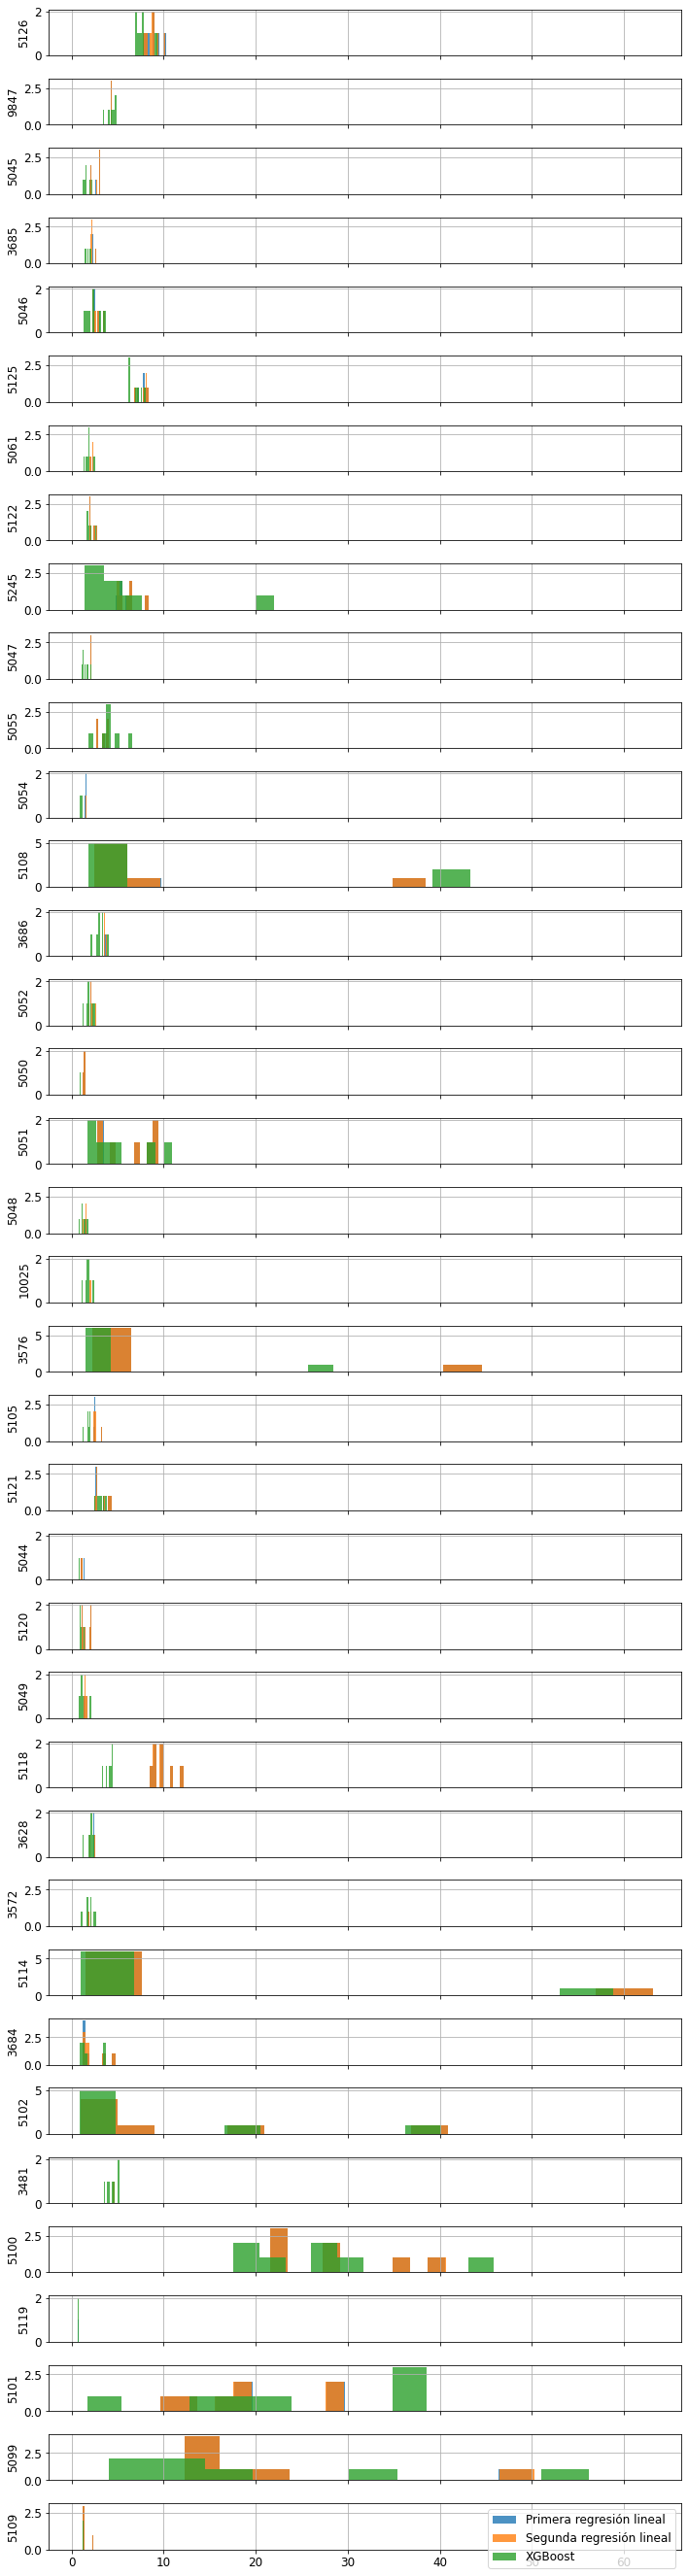

In [63]:
plot_losses(linear_regression_models+xgboost, "mae")

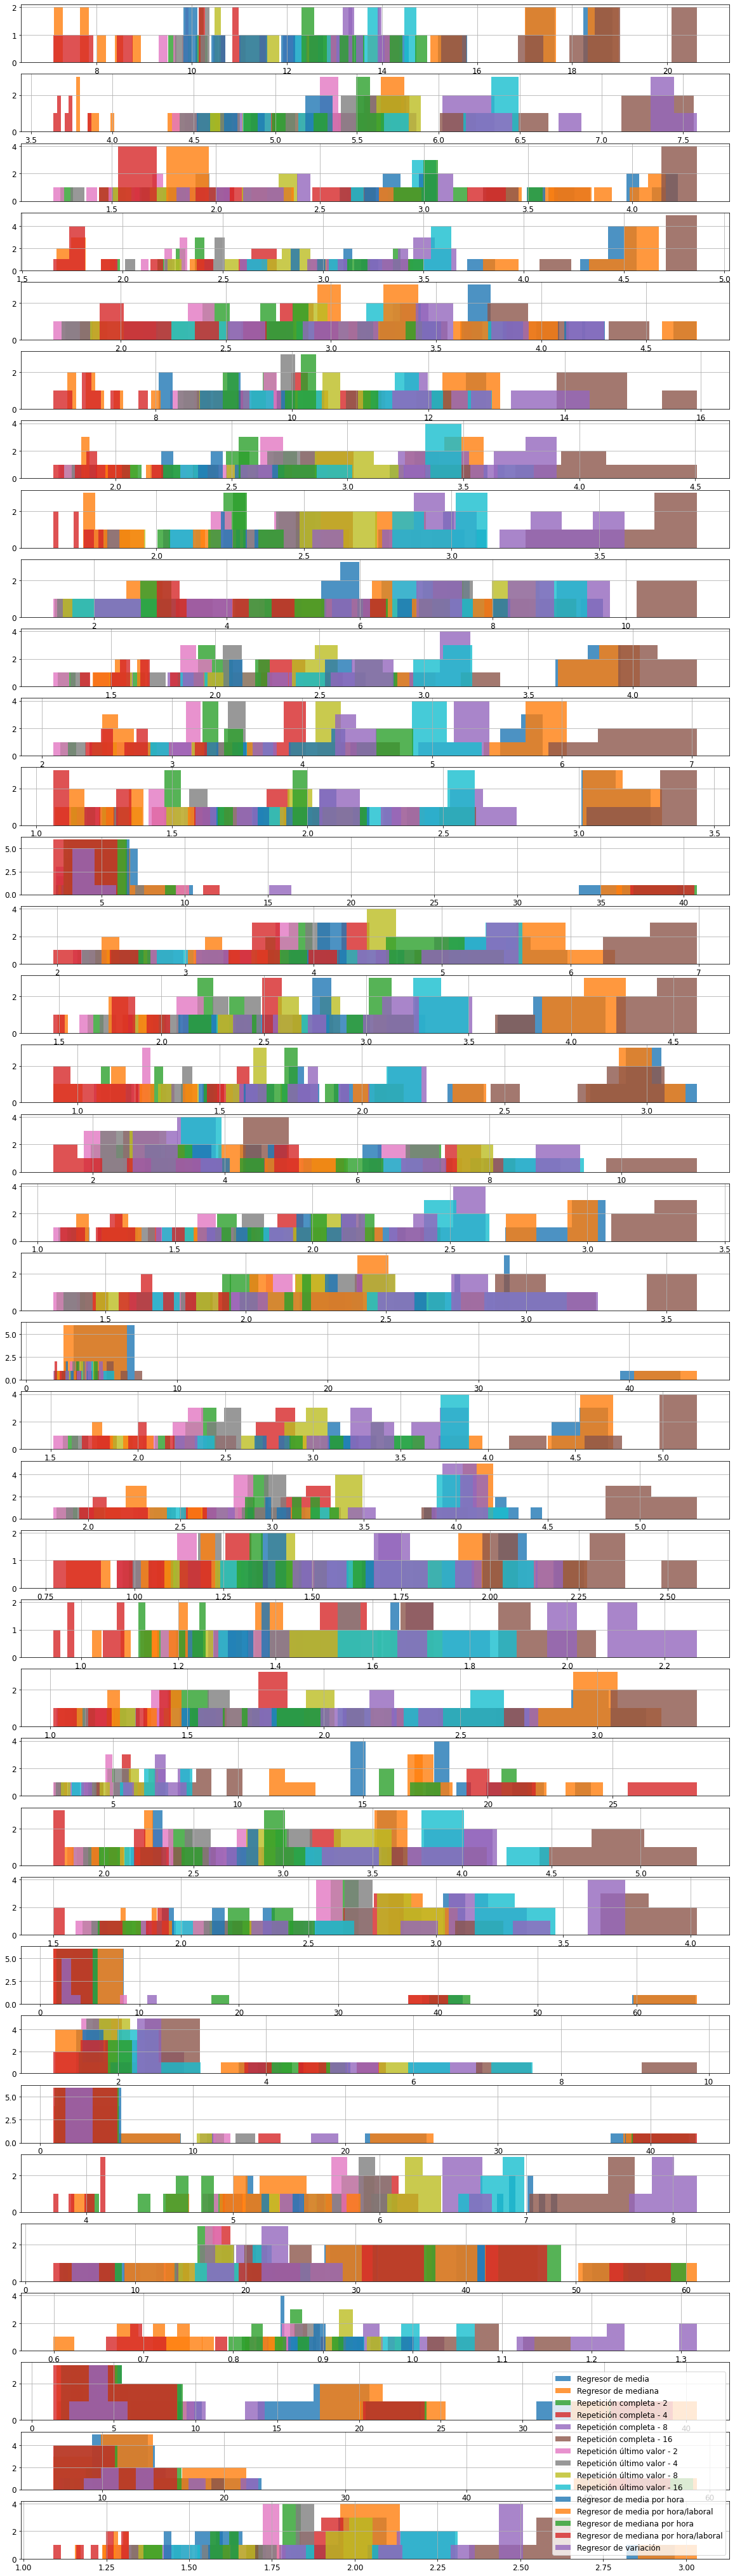

In [55]:
plot_losses(baseline_models, "mae")